In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.util import montage
import pandas as pd
from torch import optim
import re
from pathlib import Path

import PIL
import os
from concurrent.futures import ThreadPoolExecutor

With simpler model, my CPU cannot keep up with feeding the GPU due to how long resizing takes.

Let's resize the images to speed things up.

In [2]:
bbox = pd.read_csv('data/bounding_boxes.csv')

In [3]:
#SZ = 224

In [4]:
PATH = Path('data')

In [5]:
#(PATH/f'train-bbox').mkdir(exist_ok=True)
#(PATH/f'test-bbox').mkdir(exist_ok=True)

In [6]:
bbox.head()

,Image,x0,y0,x1,y1
0,72c3ce75c.jpg,0,0,1045,389
1,a7ad640ee.jpg,35,71,523,291
2,df2b6c364.jpg,12,15,1033,308
3,26013fcb5.jpg,3,1,1024,292
4,09eff7b37.jpg,11,8,926,334


In [7]:
idx = 0

In [8]:
PATH/'train'/bbox.iloc[idx].Image

PosixPath('data/train/72c3ce75c.jpg')

In [9]:
img = PIL.Image.open(PATH/'train'/bbox.iloc[idx].Image)

In [10]:
img.size

(1050, 416)

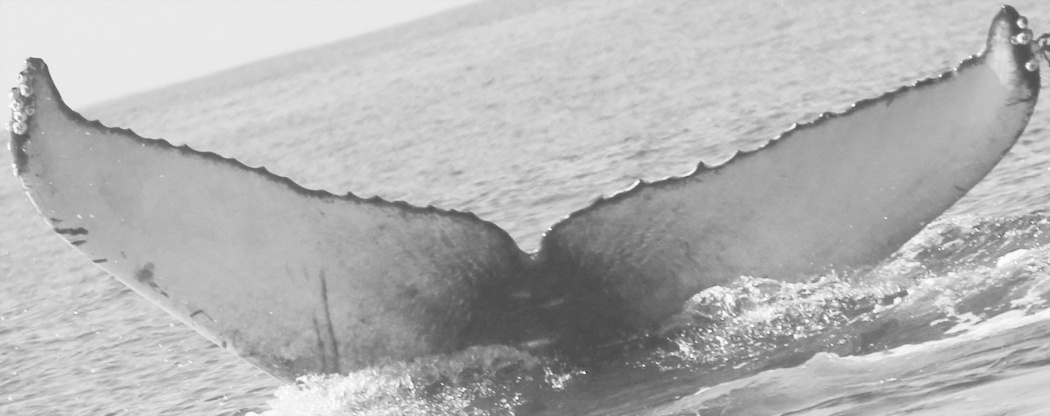

In [11]:
img

In [14]:
row.x0

NameError: name 'row' is not defined

In [23]:
def get_coords(fname):
    row = bbox[bbox.Image == fname]
    #if int(row.x0) < 5:
    #    row.x0 = 0
    #else:
    #    row.x0 -= 5
    #if int(row.y0) < 5:
    #    row.y0 = 0
    #else:
    #    row.y0 -= 5
    #row.x1 += 5
    #row.y1 += 5
    return [row.x0, row.y0, row.x1, row.y1]

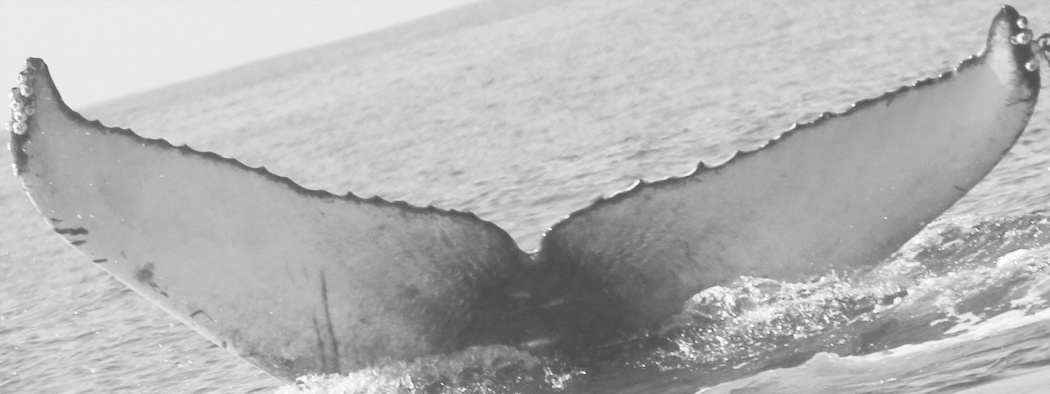

In [24]:
img.crop(box=get_coords(bbox.iloc[idx].Image))

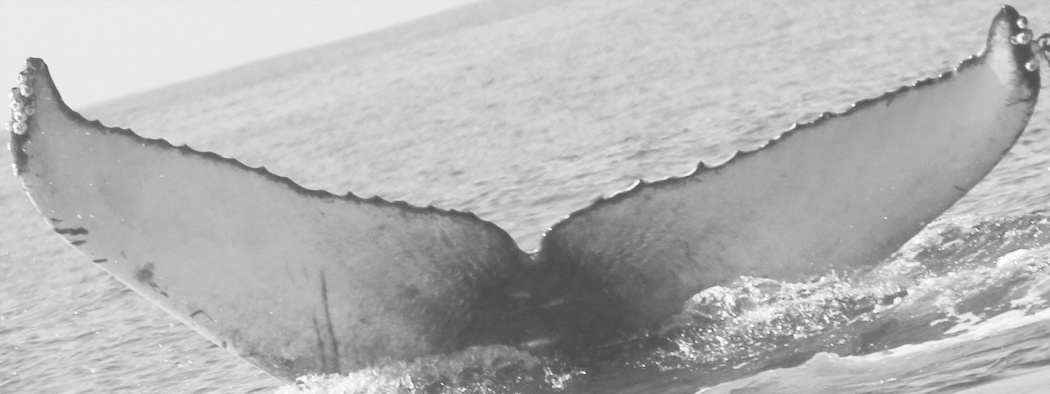

In [18]:
img.crop(box=get_coords(bbox.iloc[idx].Image))

In [14]:
#def resize_img(path):
#    PIL.Image.open(path).resize((SZ,SZ), resample=PIL.Image.BICUBIC).save((PATH/f'{path.parent.name}-bbox'/path.name))

In [67]:
def crop_bbox(path):
    img = PIL.Image.open(path)
    #print(img.size)
    img.crop(box=get_coords(str(path).split('\\')[-1])).save((PATH/f'{path.parent.name}-bbox'/path.name))

In [68]:
files = list((PATH/'train').iterdir())# + list((PATH/'test').iterdir())

In [70]:
#crop_bbox(files[0])

In [75]:
bbox[bbox.Image=='0a3b8a8e8.jpg']

,Image,x0,y0,x1,y1
29132,0a3b8a8e8.jpg,65,0,5755,695


In [ ]:
bbox[bbox.Image=='0a3b8a8e8.jpg'].x0

In [71]:
%%time
with ThreadPoolExecutor(8) as e: e.map(crop_bbox, files)

Wall time: 3min 6s


In [76]:
len(list((PATH/f'train-bbox').iterdir())), len(list((PATH/f'test-bbox').iterdir()))

(25361, 7960)

In [77]:
len(list((PATH/f'train').iterdir())), len(list((PATH/f'test').iterdir()))

(25361, 7960)